In [3]:
import mne
from oct2py import octave
import os
from tqdm import tqdm
import sys

OSError: octave-cli not found, please see README

In [2]:
octave.addpath('../../eeglab_current/eeglab2020_0/plugins/clean_rawdata1.00')
octave.addpath('../../eeglab_current/eeglab2020_0/plugins/Biosig3.3.0/biosig/eeglab')
octave.addpath('../../eeglab_current/eeglab2020_0/plugins/Biosig3.3.0/biosig/t200_FileAccess')
octave.addpath('../../eeglab_current/eeglab2020_0/plugins/Biosig3.3.0/biosig/t250_ArtifactPreProcessingQualityControl/')
octave.addpath('../../eeglab_current/eeglab2020_0/functions/popfunc')
octave.addpath('../../eeglab_current/eeglab2020_0/functions/guifunc')
octave.addpath('../../eeglab_current/eeglab2020_0/functions/adminfunc');
octave.addpath('../../eeglab_current/eeglab2020_0/functions/sigprocfunc');
octave.addpath('../../eeglab_current/eeglab2020_0/functions/miscfunc')

octave.addpath('../../matlab_R2020b_glnxa64/sys/java/jre/glnxa64/jre/bin')

'.:../../eeglab_current/eeglab2020_0/functions/miscfunc:../../eeglab_current/eeglab2020_0/functions/sigprocfunc:../../eeglab_current/eeglab2020_0/functions/adminfunc:../../eeglab_current/eeglab2020_0/functions/guifunc:../../eeglab_current/eeglab2020_0/functions/popfunc:../../eeglab_current/eeglab2020_0/plugins/Biosig3.3.0/biosig/t250_ArtifactPreProcessingQualityControl:../../eeglab_current/eeglab2020_0/plugins/Biosig3.3.0/biosig/t200_FileAccess:../../eeglab_current/eeglab2020_0/plugins/Biosig3.3.0/biosig/eeglab:../../eeglab_current/eeglab2020_0/plugins/clean_rawdata1.00:/home/sofiia/anaconda3/lib/python3.7/site-packages/oct2py:/home/sofiia/anaconda3/lib/python3.7/site-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/4.4.1/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v52/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.4.1/site/m:/usr/share/octave/site/api-v52/m:/usr/share/octave/site/m:/usr/share/

In [30]:
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

Here we are going to implement a function, which does a single .edf file preprocessing and returns cleaned .edf file.

In [3]:
def single_edf_preprocessing(file_path):
    # Reading from the .edf file 
    initial_file_name = file_path.split("/")[-1]
    try:
        print(f"Reading data from the {initial_file_name}...")
        EEG_raw = octave.pop_readedf(file_path)
    except Exception as ex:
        print("The input file cannot be accessed.")
        return ex
    # Cleaning of raw data
    try:
        print("Cleaning the data...")
        EEG_cleaned = octave.clean_rawdata(EEG_raw, [], [0.5, 1], [], [], "off", "off", [])
    except Exception as ex:
        print("There is an error while cleaning the raw data.")
        return ex
    # We turn off the functionality which is dedicated to removing specific parts of one file
    # This is performed for the reason that we do not intend to delete data fragments to keep the timeline the same as in the raw version
    
    # Saving the cleaned data into .edf file
    file_name = "filtered_" + initial_file_name
    new_file_path = '/'.join(file_path.split("/")[:-1]) + f"/{file_name}"
    try:
        print(f"Writing the cleaned data into {file_name}...")
        octave.pop_writeeeg(EEG_cleaned, new_file_path, "TYPE", "EDF")
    except Exception as ex:
        print("There are some troubles with saving the .edf file.")
        return ex
    return new_file_path

In [4]:
def create_raw_object(file_path):
    # Creating the raw edf object using mne library  
    return mne.io.read_raw_edf(file_path)

In [5]:
def visualize_data(raw_object, duration_sec, start_time, eeg_color):
    # Plotting the EEG data   
    raw_object.plot(duration=duration_sec, start=start_time, color=dict(mag='black', grad='b', eeg=eeg_color, eog='k', ecg='m',
     emg='k', ref_meg='steelblue', misc='k', stim='k',
     resp='k', chpi='k'), bad_color="maroon")

In [12]:
def find_all_paths(path):
    # Goes into all possible directories starting from initial "path" 
    # goes into all sub-directories to find .edf files     
    list_of_files = {}
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename.endswith(".edf"):
                list_of_files[filename] = os.sep.join([dirpath, filename])
    return list_of_files

In [14]:
list_of_files = list(find_all_paths("edf").values())
print(list_of_files)

['edf/train/02_tcp_le/003/00000327/s003_2003_01_13/00000327_s003_t000.edf', 'edf/train/02_tcp_le/003/00000327/s003_2003_01_13/filtered_00000327_s003_t000.edf', 'edf/train/02_tcp_le/003/00000302/s001_2003_09_24/filtered_00000302_s001_t000.edf', 'edf/train/02_tcp_le/003/00000302/s001_2003_09_24/00000302_s001_t000.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/00000302_s002_t005.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/00000302_s002_t002.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/filtered_00000302_s002_t001.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/filtered_00000302_s002_t005.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/filtered_00000302_s002_t003.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/filtered_00000302_s002_t002.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/00000302_s002_t006.edf', 'edf/train/02_tcp_le/003/00000302/s002_2003_09_25/filtered_00000302_s002_t000.edf', 'edf/train/02_tcp_le/003/00000302/s0

In [10]:
def main():
    # Main function that performs preprocessing of the files (calles supportive functions)    
    list_of_files = find_all_paths("edf").values()
    for file in list(list_of_files)[:10]:
        single_edf_preprocessing(file)

In [11]:
main()

Reading data from the 00000327_s003_t000.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A. Schloegl et al. Quality Control ... Clin. Neurophysiol. 1999, Dec; 110(12): 2165 - 2170).
   A copy is available here, too: http://pub.ist.ac.at/~schloegl/publications/neurophys1999_2165.pdf
 See also EEG2HIST: it's a tool to identify the saturation thresholds.
Event information might be encoded in the last channel
To extract these events, use menu File > Import event info > From data channel
eeg_checkset note: upper time limit (xmax) adjusted so (xmax-xmin)*srate+1 = number of frames
Cleaning the data...
burst clean disabled.
bad window rej disabled.
Now removing flat-line channels...
Removing 5 channel(s)...
Scanning for bad channels...
Your d

 See also EEG2HIST: it's a tool to identify the saturation thresholds.
Event information might be encoded in the last channel
To extract these events, use menu File > Import event info > From data channel
eeg_checkset note: upper time limit (xmax) adjusted so (xmax-xmin)*srate+1 = number of frames
Cleaning the data...
burst clean disabled.
bad window rej disabled.
Now removing flat-line channels...
Removing 5 channel(s)...
Scanning for bad channels...
Your dataset appears to lack correct channel locations; using a location-free channel cleaning method.
Now removing bad channels...
Removing 4 channel(s)...
Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00000302_s001_t000.edf...
Warning SOPEN (EDF-Write): relative scaling error is 8.749184e-07 (due to roundoff in PhysMax/Min)
Reading data from the 00000302_s002_t005.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not suppor

eeg_checkset note: upper time limit (xmax) adjusted so (xmax-xmin)*srate+1 = number of frames
Cleaning the data...
burst clean disabled.
bad window rej disabled.
Now removing flat-line channels...
Removing 1 channel(s)...
Scanning for bad channels...
Your dataset appears to lack correct channel locations; using a location-free channel cleaning method.
Now removing bad channels...
Removing 8 channel(s)...
Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00000302_s002_t005.edf...
Warning SOPEN (EDF-Write): relative scaling error is 1.841074e-06 (due to roundoff in PhysMax/Min)
Reading data from the 00000302_s002_t002.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A.

Scanning for bad channels...
Your dataset appears to lack correct channel locations; using a location-free channel cleaning method.
Now removing bad channels...
Removing 1 channel(s)...
Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00000302_s002_t002.edf...
Warning SOPEN (EDF-Write): relative scaling error is 3.196151e-06 (due to roundoff in PhysMax/Min)
Reading data from the 00000302_s002_t006.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A. Schloegl et al. Quality Control ... Clin. Neurophysiol. 1999, Dec; 110(12): 2165 - 2170).
   A copy is available here, too: http://pub.ist.ac.at/~schloegl/publications/neurophys1999_2165.pdf
 See also EEG2HIST: it's a too

Scanning for bad channels...
Your dataset appears to lack correct channel locations; using a location-free channel cleaning method.
Now removing bad channels...
Removing 2 channel(s)...
Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00000302_s002_t006.edf...
Warning SOPEN (EDF-Write): relative scaling error is 2.698967e-06 (due to roundoff in PhysMax/Min)
Reading data from the 00000302_s002_t000.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A. Schloegl et al. Quality Control ... Clin. Neurophysiol. 1999, Dec; 110(12): 2165 - 2170).
   A copy is available here, too: http://pub.ist.ac.at/~schloegl/publications/neurophys1999_2165.pdf
 See also EEG2HIST: it's a too

Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00000302_s002_t000.edf...
Warning SOPEN (EDF-Write): relative scaling error is 1.684522e-06 (due to roundoff in PhysMax/Min)
Reading data from the 00000302_s002_t004.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A. Schloegl et al. Quality Control ... Clin. Neurophysiol. 1999, Dec; 110(12): 2165 - 2170).
   A copy is available here, too: http://pub.ist.ac.at/~schloegl/publications/neurophys1999_2165.pdf
 See also EEG2HIST: it's a tool to identify the saturation thresholds.
Event information might be encoded in the last channel
To extract these events, use menu File > Import event info > From data channel
eeg_checkse

Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00000302_s002_t004.edf...
Warning SOPEN (EDF-Write): relative scaling error is 3.195040e-06 (due to roundoff in PhysMax/Min)
Reading data from the 00000302_s002_t003.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A. Schloegl et al. Quality Control ... Clin. Neurophysiol. 1999, Dec; 110(12): 2165 - 2170).
   A copy is available here, too: http://pub.ist.ac.at/~schloegl/publications/neurophys1999_2165.pdf
 See also EEG2HIST: it's a tool to identify the saturation thresholds.
Event information might be encoded in the last channel
To extract these events, use menu File > Import event info > From data channel
eeg_checkse

eeg_checkset note: upper time limit (xmax) adjusted so (xmax-xmin)*srate+1 = number of frames
Cleaning the data...
burst clean disabled.
bad window rej disabled.
Now removing flat-line channels...
Removing 6 channel(s)...
Scanning for bad channels...
Your dataset appears to lack correct channel locations; using a location-free channel cleaning method.
Now removing bad channels...
Removing 2 channel(s)...
Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00000302_s002_t001.edf...
Warning SOPEN (EDF-Write): relative scaling error is 4.033862e-06 (due to roundoff in PhysMax/Min)
Reading data from the 00002807_s001_t001.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A.

Cleaning the data...
burst clean disabled.
bad window rej disabled.
Now removing flat-line channels...
Removing 4 channel(s)...
Scanning for bad channels...
Your dataset appears to lack correct channel locations; using a location-free channel cleaning method.
Now removing bad channels...
Removing 10 channel(s)...
Rank check passed.
Use vis_artifacts to compare the cleaned data to the original.
Writing the cleaned data into filtered_00002807_s001_t001.edf...
Warning SOPEN (EDF-Write): relative scaling error is 2.407956e-06 (due to roundoff in PhysMax/Min)


In [ ]:
raw = visualize_data(create_raw_object(single_edf_preprocessing(list_of_files[-4])), 1, 10, "darkblue")

Reading data from the 00001891_s001_t000.edf...
Reading EDF format using BIOSIG...
WARNING SOPEN(EDF): Automated Overflowdetection not supported for EDF and BDF data, because
   Physical Max/Min values of EDF/BDF data are not necessarily defining the dynamic range.
   For more information see: http://dx.doi.org/10.1016/S1388-2457(99)00172-8 (A. Schloegl et al. Quality Control ... Clin. Neurophysiol. 1999, Dec; 110(12): 2165 - 2170).
   A copy is available here, too: http://pub.ist.ac.at/~schloegl/publications/neurophys1999_2165.pdf
 See also EEG2HIST: it's a tool to identify the saturation thresholds.
Event information might be encoded in the last channel
To extract these events, use menu File > Import event info > From data channel
eeg_checkset note: upper time limit (xmax) adjusted so (xmax-xmin)*srate+1 = number of frames
Cleaning the data...
burst clean disabled.
bad window rej disabled.
Now removing flat-line channels...
Removing 5 channel(s)...
Scanning for bad channels...
Your d

In [13]:
# All the channels names available in raw data
print(rawEDF.ch_names)
print(rawEDF_filtered.ch_names)

['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']
['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG T1-REF', 'EEG T2-REF', 'Status']


In [5]:
# Check to what channel type the data belongs
print(rawEDF.__contains__('eeg'))
print(rawEDF_filtered.__contains__('eeg'))

True
True


25000 25250
(25, 250)
(250,)
(6, 250)
(250,)


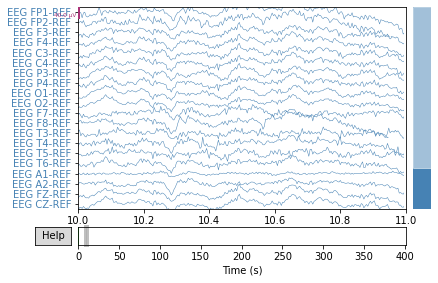

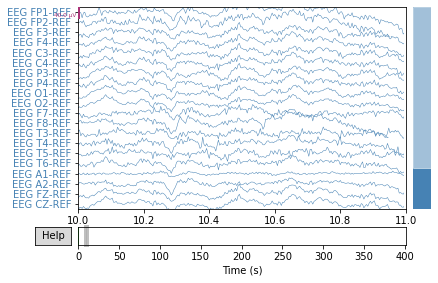

In [33]:
# .time_as_index() --> converts time to indeces (seconds into indeces in a matrix)
start, stop = rawEDF.time_as_index([100, 101])
print(start, stop)
data, times = rawEDF[:, start:stop]
# data --> a segment of raw data
# times --> time points
print(data.shape)
print(times.shape)
data, times = rawEDF[2:20:3, start:stop]
print(data.shape)
print(times.shape)
rawEDF.plot(duration=1.0, start=10.0, color=dict(mag='darkblue', grad='b', eeg='steelblue', eog='k', ecg='m',
     emg='k', ref_meg='steelblue', misc='k', stim='k',
     resp='k', chpi='k'), bad_color="maroon")